# Lecture 6

## Combining Data


## Outline
* Concatenate vertically
* Tangent: Working with time series data
* Concatenate horizontally
* Join and Merge


### Part 1

# Concatenating Vertically

## Data in (many) similar files

<br/>
<div class="image-txt-container">
  
<img src="imgs/many_files.png" width="50%">


* Storage considerations?
* Collected over time?
* *How do we combine them?*

</div>



### Row-wise combination of data:  `concat`




<br/>
<div class="image-txt-container">

* `pd.concat` combines DataFrame and Series objects.
* By default, the rows of objects are stacked.
* `concat` has many options; we'll learn them slowly.

<img src="imgs/merging_append3.png" width="70%">


</div>


### How to implement appending of rows? (Roughly)

* Assuming columns match 1-to-1, in same order.
* Assume we have a `list_of_tables` to combine row-wise.
```
out = []
for tbl in list_of_tables:
    for row in tbl:
        out = out + [row]
```

* How would you adapt to columns with different orders?

### `pd.concat` by example
* The `pd.concat` function concatenates DataFrames (stacks them).
* By, default, `pd.concat` stacks DataFrames row-wise.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a first DataFrame

d = {
    'Name':['Marina','Aaron','Max','Cathy'],
    'Grade1':[76, 45, 89, 71],
    'Grade2':[64, 67, 85, 93],
    }
 
class_1 = pd.DataFrame(d)
class_1

Name  Grade1  Grade2
0  Marina      76      64
1   Aaron      45      67
2     Max      89      85
3   Cathy      71      93

In [3]:
# Create a second DataFrame

d = {
    'Grade1':[87, 56, 25],
    'Name':['Emily','Rob','Zoe'],
    'Grade2':[76, 23, 67],
    }
 
class_2 = pd.DataFrame(d)
class_2

Grade1   Name  Grade2
0      87  Emily      76
1      56    Rob      23
2      25    Zoe      67

In [4]:
# Lets concatenate two dataframes df1 and df2

pd.concat([class_1,class_2])

Name  Grade1  Grade2
0  Marina      76      64
1   Aaron      45      67
2     Max      89      85
3   Cathy      71      93
0   Emily      87      76
1     Rob      56      23
2     Zoe      25      67

In [5]:
# what would you want to change about table?

combined = pd.concat([class_1,class_2], ignore_index = True)
combined

Name  Grade1  Grade2
0  Marina      76      64
1   Aaron      45      67
2     Max      89      85
3   Cathy      71      93
4   Emily      87      76
5     Rob      56      23
6     Zoe      25      67

In [6]:
# we can set the key for each concatenated table:

combined = pd.concat([class_1,class_2], keys = ["Class 1", "Class 2"])
combined

Name  Grade1  Grade2
Class 1 0  Marina      76      64
        1   Aaron      45      67
        2     Max      89      85
        3   Cathy      71      93
Class 2 0   Emily      87      76
        1     Rob      56      23
        2     Zoe      25      67

In [7]:
# how to use it: 

combined.loc["Class 1"]
#combined.loc["Class 1"].loc[0]


Name  Grade1  Grade2
0  Marina      76      64
1   Aaron      45      67
2     Max      89      85
3   Cathy      71      93

## Missing Columns?

- What if one dataframe has a column that the other does not have?

In [8]:
ex_1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [4, 5, 6]
})

ex_2 = pd.DataFrame({
    'col_1': [7, 8, 9],
    'col_3': [-1, -2, -3]
})

pd.concat([ex_1, ex_2])

col_1  col_2  col_3
0      1    4.0    NaN
1      2    5.0    NaN
2      3    6.0    NaN
0      7    NaN   -1.0
1      8    NaN   -2.0
2      9    NaN   -3.0

## concat copies

- Don't do concat in a loop:

```
total = pd.DataFrame()
for df in dataframes:
    total = total.concat(df)
```

- Instead:
total = pd.concat(dataframes)


### Part 2

# Tangent: Working with time series data

## Common Combination: time series

* Data is often partitioned by time: e.g. there may be one `csv` file per day for 1 year.
    - `concat` the different dataframes, perhaps using information about the day.

## Short Detour: Datetime Types

When working with time data, you'll see two different kinds of "times":

* "datetimes" reference particular moments in time (e.g., Sat 8th, 2019 at 3:00pm).
    - could potentially just be a date / and or time
        - e.g., Sept. 03, 1752
        - e.g., 11:59 pm
    - timezones are usually not stored (and kind of a mess)
* "time deltas" or durations reference an exact length of time (e.g., a duration of 3 hours).

## Short Detour: Datetime Types

- python: `datetime` objects
    - much more convenient than working with strings

In [10]:
import datetime

In [11]:
datetime.datetime.now()

datetime.datetime(2021, 10, 12, 18, 0, 36, 716961)

In [12]:
datetime.datetime.now() + datetime.timedelta(days=3, hours=5)

datetime.datetime(2021, 10, 15, 23, 0, 37, 604944)

In [13]:
# Unix timestamp: seconds since Jan 01, 1970
datetime.datetime.now().timestamp()

1634086840.988756

In [14]:
datetime.datetime.fromtimestamp(8 * 3600)

datetime.datetime(1970, 1, 1, 0, 0)

### Time Series in `Pandas`

- `pd.Timestamp` is (one way) that pandas stores datetimes.
    - more efficient than Python `datetime` objects
- internally, number of seconds from some reference date
    - often, "Unix timestamp": seconds since January 1st, 1970
* `pd.to_datetime` converts strings to timestamps.
* Timestamps have time-related attributes (`dayofweek`, `hour/min/sec`).
* Subtracting timestamps yield time-delta objects.

In [15]:
final_start = pd.to_datetime("8th of June, 2021, 12:00am")
final_start

Timestamp('2021-06-08 00:00:00')

In [16]:
final_finish = pd.to_datetime("8th of June, 2021, 11:59pm")
final_finish

Timestamp('2021-06-08 23:59:00')

In [17]:
pd.to_datetime('11:59pm on Jun 08, 2021')

Timestamp('2021-06-08 23:59:00')

In [18]:
pd.to_datetime('2021-06-08T23:59:00') # ISO 8601 standard format

Timestamp('2021-06-08 23:59:00')

In [19]:
# useful attributes
final_finish.dayofweek

1

In [20]:
final_finish.year

2021

In [21]:
final_finish - final_start

Timedelta('0 days 23:59:00')

## Series of Times

- If we create a Series of datetimes with `pd.to_datetime`, pandas stores them as yet *another* type:
`np.datetime64`
- Similar to `Timestamp`, but optimized for memory and speed efficiency
- If we access a single time, we get a `Timestamp` back
- For more: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [22]:
times = pd.DataFrame({'finish': pd.to_datetime(['Sun, Jan 01, 1989', '2021-02-02T11:00', '1/1/1970'])})
times

finish
0 1989-01-01 00:00:00
1 2021-02-02 11:00:00
2 1970-01-01 00:00:00

In [23]:
times['finish']

0   1989-01-01 00:00:00
1   2021-02-02 11:00:00
2   1970-01-01 00:00:00
Name: finish, dtype: datetime64[ns]

In [24]:
times.iloc[0, 0]

Timestamp('1989-01-01 00:00:00')

### Question: 

In the tables of student grades, who finished exam the fasted among all students in a class?

Approach:
1. Concatenate both tables
2. Convert columns to datetime objects
3. Find the difference between finish and start (time deltas)
4. Sort 
5. Pick the fastest exam taker


In [25]:
final_v1 = pd.DataFrame( {"name": ["Marina", "Max", "Robert"],
                        "start_exam": ["15:00", "15:02", "15:01"],
                        "finish_exam": ["16:00", "17:58", "17:05"]}
)
final_v1

name start_exam finish_exam
0  Marina      15:00       16:00
1     Max      15:02       17:58
2  Robert      15:01       17:05

In [26]:
final_v2 = pd.DataFrame( {"name": ["Martha", "Justin", "Tom"],
                        "start_exam": ["18:00", "18:06", "19:07"],
                        "finish_exam": ["20:00", "20:50", "20:59"]}
)
final_v2

name start_exam finish_exam
0  Martha      18:00       20:00
1  Justin      18:06       20:50
2     Tom      19:07       20:59

In [27]:
#1.

both_versions = pd.concat([final_v1,final_v2])
both_versions

name start_exam finish_exam
0  Marina      15:00       16:00
1     Max      15:02       17:58
2  Robert      15:01       17:05
0  Martha      18:00       20:00
1  Justin      18:06       20:50
2     Tom      19:07       20:59

In [28]:
#2.

both_versions = both_versions.assign(
    start_exam=pd.to_datetime(both_versions["start_exam"]),
    finish_exam=pd.to_datetime(both_versions["finish_exam"])
)

both_versions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         6 non-null      object        
 1   start_exam   6 non-null      datetime64[ns]
 2   finish_exam  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 192.0+ bytes


In [29]:
#3.

both_versions = both_versions.assign(
    elapsed=both_versions["finish_exam"] - both_versions["start_exam"]
)

both_versions

name          start_exam         finish_exam         elapsed
0  Marina 2021-10-12 15:00:00 2021-10-12 16:00:00 0 days 01:00:00
1     Max 2021-10-12 15:02:00 2021-10-12 17:58:00 0 days 02:56:00
2  Robert 2021-10-12 15:01:00 2021-10-12 17:05:00 0 days 02:04:00
0  Martha 2021-10-12 18:00:00 2021-10-12 20:00:00 0 days 02:00:00
1  Justin 2021-10-12 18:06:00 2021-10-12 20:50:00 0 days 02:44:00
2     Tom 2021-10-12 19:07:00 2021-10-12 20:59:00 0 days 01:52:00

In [30]:
#4.

both_versions.sort_values("elapsed").iloc[0].loc["name"]


'Marina'

### Part 3

# Concatenate Horizontally

## Related data; different measurements

<br/>
<div class="image-txt-container">
  
<img src="imgs/two_tables.jpg" width="100%">

<div></div>


* Same individuals; different attributes.
* Collected for different purposes.
* *How do we combine them?*

</div>



### What if our grades were in separate tables?

* Can we create a single table with all grades?
* Try `concat`!


In [31]:
# add another dataframe as a column(s)

d = {
    'Name':['Marina','Aaron','Max','Cathy'],
    'Grade1':[76, 45, 89, 71],
    }
 
new_class_1 = pd.DataFrame(d)
display(new_class_1)


d = {
    'Name':['Marina','Aaron','Max','Cathy'],
    'Grade2':[54, 65, 23, 87],
    }
 
new_class_2 = pd.DataFrame(d)
display(new_class_2)

Name  Grade1
0  Marina      76
1   Aaron      45
2     Max      89
3   Cathy      71

Name  Grade2
0  Marina      54
1   Aaron      65
2     Max      23
3   Cathy      87

In [32]:
# if you simply use pd.concat([df1, df2]), what will you get?

pd.concat([new_class_1, new_class_2])

Name  Grade1  Grade2
0  Marina    76.0     NaN
1   Aaron    45.0     NaN
2     Max    89.0     NaN
3   Cathy    71.0     NaN
0  Marina     NaN    54.0
1   Aaron     NaN    65.0
2     Max     NaN    23.0
3   Cathy     NaN    87.0

In [33]:
# argument axis comes to rescue

pd.concat([new_class_1, new_class_2], axis = 1)

Name  Grade1    Name  Grade2
0  Marina      76  Marina      54
1   Aaron      45   Aaron      65
2     Max      89     Max      23
3   Cathy      71   Cathy      87

### Column-wise combination of data:  `concat` 


<br/>
<div class="image-txt-container">
    
    
<div></div>
    
* Joining different measurements of the same observations.
* Argument `axis=1` specifies column-wise.
* Joining is done by matching *indices*

<img src="imgs/merging_concat_series_ignore_index.png">
</div>

In [34]:
class_1_indexed = new_class_1.set_index('Name')
class_1_indexed

Grade1
Name          
Marina      76
Aaron       45
Max         89
Cathy       71

In [35]:
class_2_indexed = new_class_2.sample(frac=1, replace=False).set_index('Name')
class_2_indexed

Grade2
Name          
Max         23
Cathy       87
Marina      54
Aaron       65

In [36]:
pd.concat([
    class_1_indexed,
    class_2_indexed
], axis=1)

Grade1  Grade2
Name                  
Marina      76      54
Aaron       45      65
Max         89      23
Cathy       71      87

## Missing rows?

What if one dataframe has some rows that the other does not?

In [37]:
display(class_1_indexed)


d = {
    'Name':['Cathy','Max'],
    'Grade2':[87, 23],
    }
 
short_class = pd.DataFrame(d).set_index('Name')
display(short_class)

Grade1
Name          
Marina      76
Aaron       45
Max         89
Cathy       71

Grade2
Name         
Cathy      87
Max        23

In [38]:
pd.concat([class_1_indexed, short_class], axis = 1, sort=True)

Grade1  Grade2
Name                  
Aaron       45     NaN
Cathy       71    87.0
Marina      76     NaN
Max         89    23.0

### `concat` observations

* `concat` combines lists of dataframes row/column-wise using `axis` keyword
* Columns are matched via index; Rows are matched via columns.
* Set `ignore_index=True` to match by row number (faster).

**shortcomings**
* Must take care of your indices for matching,
* Displays duplicate columns.

### Intermission

# Numba

## Python loops are slow

- Tied to the dynamicism of Python.

In [39]:
class Doubler:
    
    def __radd__(self, x):
        return x + x

In [40]:
double = Doubler()
3 + double

6

In [41]:
lst = [5, double, 3, double, 3.5]

In [42]:
sum(lst)

29.5

## Python loops are slow


In [43]:
# selection sort
def selection_sort(arr):
    """In-place selection sort."""
    n = len(arr)
    if n <= 1:
        return
    for barrier_ix in range(n-1):
        # find index of min in arr[start:]
        min_ix = find_minimum(arr, start=barrier_ix)
        #swap
        arr[barrier_ix], arr[min_ix] = (
                arr[min_ix], arr[barrier_ix]
        )
        
def find_minimum(arr, start):
    """Finds index of minimum. Assumes non-empty."""
    n = len(arr)
    min_value = arr[start]
    min_ix = start
    for i in range(start + 1, n):
        if arr[i] < min_value:
            min_value = arr[i]
            min_ix = i
    return min_ix

In [47]:
data = np.random.uniform(0, 1, 10_000)

In [48]:
%%time
selection_sort(data)

CPU times: user 4.12 s, sys: 0 ns, total: 4.12 s
Wall time: 4.12 s


## Python loops are slow?

In [49]:
def selection_sort_jit(arr):
    """In-place selection sort."""
    n = len(arr)
    if n <= 1:
        return
    for barrier_ix in range(n-1):
        # find index of min in arr[start:]
        min_ix = find_minimum_jit(arr, start=barrier_ix)
        #swap
        arr[barrier_ix], arr[min_ix] = (
                arr[min_ix], arr[barrier_ix]
        )
        
def find_minimum_jit(arr, start):
    """Finds index of minimum. Assumes non-empty."""
    n = len(arr)
    min_value = arr[start]
    min_ix = start
    for i in range(start + 1, n):
        if arr[i] < min_value:
            min_value = arr[i]
            min_ix = i
    return min_ix

In [50]:
%%time
selection_sort_jit(data)

KeyboardInterrupt: 

## What is "jitting"?

- "Just-in-time" compilation
    - Or "justin time" compilation
- Downsides:
    - works only for a subset of Python
    - put loops in numba, not numba in loops

In [51]:
data = np.random.uniform(0, 1, 10_000_000)

In [52]:
%%time
for i, x in enumerate(data):
    data[i] *= 2

CPU times: user 3.45 s, sys: 0 ns, total: 3.45 s
Wall time: 3.45 s


In [53]:
@numba.jit
def double(x):
    return 2 * x

NameError: name 'numba' is not defined

In [ ]:
%%time
for i, x in enumerate(data):
    data[i] *= double(x)

In [ ]:
@numba.jit
def double_all(arr):
    for i, x in enumerate(arr):
        arr[i] *= 2

In [ ]:
%%time
double_all(data)

In [ ]:
%%time
data * 2

### Part 4

# Join and Merge

## Column-wise combination of data, revisted

* `concat` performs "simple" horizontal concatenation
* `join`, and `merge` combine columns in more advanced ways

## Joins

<br/>
<div class="image-txt-container">
    
    
<div></div>

* A **join** combines: 
    - the columns from two tables 
    - to create a new table

* Combine two kinds of information:
    - about the same entity,
    - linked by a common feature/column
* The common column is the **join key**
* Example join by a common column (1-to-1 join):


<img src="imgs/join.png" width="100%">

</div>

## Joining columns: Pandas `merge`


* `merge` joins tables by columns or indexes.
* 'merges' columns in common, by default


In [54]:
# Creating small dataframes

d = {
    'City':['San Diego','Moscow', 'Rome'],
    'Temp':[76, 28, 56],
    }
 
df1 = pd.DataFrame(d)


d = {
    'City':['San Diego','Moscow', 'Shanghai'],
    'Wind speed':[3, 11, 7],
    }
 
df2 = pd.DataFrame(d)

display(df1)
display(df2)

City  Temp
0  San Diego    76
1     Moscow    28
2       Rome    56

City  Wind speed
0  San Diego           3
1     Moscow          11
2   Shanghai           7

In [55]:
# automagically infers the common column, "City"
df3 = df1.merge(df2)

display(df3)

City  Temp  Wind speed
0  San Diego    76           3
1     Moscow    28          11

In [56]:
# there are several ways of doing the same thing
pd.concat([df1.set_index('City'), df2.set_index('City')], join='inner', axis=1)

Temp  Wind speed
City                       
San Diego    76           3
Moscow       28          11

## Join types: inner joins

<br/>
<div class="image-txt-container">
<div></div>

* `Rome` and `Shanghai` does not show up in the merged table! 
* Why? because there is:
    - no city `Rome` in the second table and 
    - no city `Shanghai` in the first table. 
* 'Inner joins' represent the `intersection` of the keys.


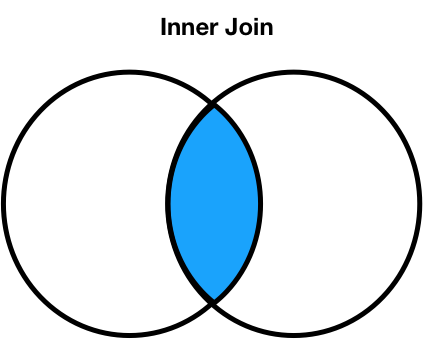

</div>




## Different join types handle mismatches differently


<br/>
<div class="image-txt-container">
<div></div>

* Inner: keep *only* matched keys.
    - intersection of keys
* Outer: keep all non-matched keys.
    - union of keys
* Left: keep non-matched keys in left table.
    - left keys $\cup$ (right keys $\cap$ left keys)
* Right: keep non-matched keys in right table.
    - right keys $\cup$ (right keys $\cap$ left keys)

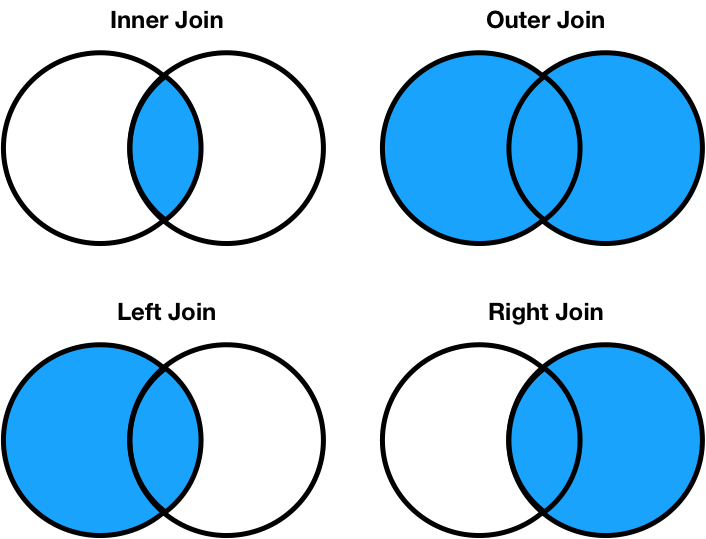

</div>




In [57]:
# union 

df3_outer = pd.merge(df1, df2, how = "outer")
df3_outer

# what happens to the missing fields? Replaced with NaN

City  Temp  Wind speed
0  San Diego  76.0         3.0
1     Moscow  28.0        11.0
2       Rome  56.0         NaN
3   Shanghai   NaN         7.0

In [58]:
# this is what concat does by default
pd.concat([df1.set_index('City'), df2.set_index('City')], axis=1)

Temp  Wind speed
City                       
San Diego  76.0         3.0
Moscow     28.0        11.0
Rome       56.0         NaN
Shanghai    NaN         7.0

In [59]:
# left join. Predict the output. How many columns? How many rows?

display(df1)
display(df2)

df3_left  = pd.merge(df1, df2, how = "left")
df3_left

City  Temp
0  San Diego    76
1     Moscow    28
2       Rome    56

City  Wind speed
0  San Diego           3
1     Moscow          11
2   Shanghai           7

City  Temp  Wind speed
0  San Diego    76         3.0
1     Moscow    28        11.0
2       Rome    56         NaN

In [60]:
# Right join. What is the output?

df3_right  = pd.merge(df1, df2, on ="City", how = "right")
df3_right

City  Temp  Wind speed
0  San Diego  76.0           3
1     Moscow  28.0          11
2   Shanghai   NaN           7

### What if the tables share multiple columns
* Specify the name of the join column using the keyword `on`

In [65]:
display(class_1)
display(class_2)

Name  Grade1  Grade2
0  Marina      76      64
1   Aaron      45      67
2     Max      89      85
3   Cathy      71      93

Grade1   Name  Grade2
0      87  Emily      76
1      56    Rob      23
2      25    Zoe      67

In [63]:
# let's merge on Name
# You can join on multiple columns: on = [Col_name1, col_name2, ...]
merged = class_1.merge(class_2, on='Name', how='outer')
merged

Name  Grade1_x  Grade2_x  Grade1_y  Grade2_y
0  Marina      76.0      64.0       NaN       NaN
1   Aaron      45.0      67.0       NaN       NaN
2     Max      89.0      85.0       NaN       NaN
3   Cathy      71.0      93.0       NaN       NaN
4   Emily       NaN       NaN      87.0      76.0
5     Rob       NaN       NaN      56.0      23.0
6     Zoe       NaN       NaN      25.0      67.0

In [64]:
# You can have more descriptive labels for columns using flag suffixes 

merged = class_1.merge(class_2, on = "Name", how = "outer", suffixes = ("_class1", "_class2"))
merged

Name  Grade1_class1  Grade2_class1  Grade1_class2  Grade2_class2
0  Marina           76.0           64.0            NaN            NaN
1   Aaron           45.0           67.0            NaN            NaN
2     Max           89.0           85.0            NaN            NaN
3   Cathy           71.0           93.0            NaN            NaN
4   Emily            NaN            NaN           87.0           76.0
5     Rob            NaN            NaN           56.0           23.0
6     Zoe            NaN            NaN           25.0           67.0

In [ ]:
# What if the columns you want to join on have different labels?


d = {
    'City':['San Diego','Moscow', 'Rome'],
    'Temp':[76, 28, 56],
    }
 
df1 = pd.DataFrame(d)


d = {
    'city':['San Diego','Moscow', 'Shanghai'],
    'Wind speed':[3, 11, 7],
    }
 
df2 = pd.DataFrame(d)

display(df1)
display(df2)


In [ ]:
df1.merge(df2)

In [ ]:
merged = pd.merge(df1, df2, left_on = "City", right_on = "city") #, how = "outer")
display(merged)


## Basic joins conclusion

* Joining tables: Combining rows of multiple tables
* Outer join
    - Union of index sets (all labels, no repetition)
    - Missing fields filled with NaN
* Inner join
    - Intersection of index sets (only common labels)
* Left/Right Joins
    - Keep index set for left/right table
    - Missing fields filled with NaN

### How to implement joins? (roughly)

* Assume we want to join two tables `tbl1` and `tbl1` on a common column `key`
* Assume the join keys are distinct, in 1-to-1 correspondence.

```
tbl1.sort(by='key') # sort tables
tbl2.sort(by='key')
out = []
for i=1 ... len(tbl1)
    out = out + [tbl1.row(i) + tbl2.row(i)]
```

* How would it change if keys are not 1-to-1?

# Join method. FYI

* is a convenience method for combining the columns of two DataFrames with less typing

* `pandas.merge()` is the underlying function used for all merge/join behavior.

## main differences between `df.join()` and `df.merge()`:


* left vs inner join: `df1.join(df2)` does a left join by default (keeps all rows of `df1`), but `df.merge` does an inner join by default (returns only matching rows of `df1` and `df2`).

* lookup on right table: `df1.join(df2`) always joins via the index of `df2`, but `df1.merge(df2)` can join to one or more columns of `df2` (default) or to the index of` df2` (with `right_index=True`).

* lookup on left table: by default,` df1.join(df2)` uses the index of `df1` and `df1.merge(df2)` uses column(s) of `df1`. That can be overridden by specifying `df1.join(df2, on=key_or_keys`) or `df1.merge(df2, left_index=True)`.



from here: https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas

### Part 5

# Many-to-* Joins

## Many-to-one joins

Many-to-one joins are 
* joins where *one* of the DataFrames contains duplicate values of keys. 
* The resulting DataFrame will preserve those duplicate entries as appropriate. 

Consider the following example of a many-to-one join:

In [68]:
faculty  = pd.DataFrame({'Faculty': ["Langlois", "Eldridge", "Alvarado", "Voytek"],
                    'Department': ["DSC", "DSC", "CSE", "COGS"],
                    'Email':['L@ucsd', 'F@ucsd', "A@ucsd", "V@ucsd"]
                   })

display (faculty)

depts = pd.DataFrame({'Department': ["DSC", "CSE", "COGS", "BIOLOGY"],
                      'Chair':["Eldridge", "Lerner", "Kutas", "Kuffler"]})

display (depts)

Faculty Department   Email
0  Langlois        DSC  L@ucsd
1  Eldridge        DSC  F@ucsd
2  Alvarado        CSE  A@ucsd
3    Voytek       COGS  V@ucsd

Department     Chair
0        DSC  Eldridge
1        CSE    Lerner
2       COGS     Kutas
3    BIOLOGY   Kuffler

In [70]:
# Let's merge on department:

#result = pd.merge(faculty, depts)
result = faculty.merge(depts)
result

# The resulting DataFrame has an additional column 
# with the "Chair" information, where the information is repeated 
# in one or more locations as required by the inputs.

Faculty Department   Email     Chair
0  Langlois        DSC  L@ucsd  Eldridge
1  Eldridge        DSC  F@ucsd  Eldridge
2  Alvarado        CSE  A@ucsd    Lerner
3    Voytek       COGS  V@ucsd     Kutas

## Many-to-many joins

Many-to-many joins are
* joins where *neither* DataFrames have unique join keys.

Consider the following example:

In [72]:
faculty  = pd.DataFrame({'Faculty': ["Langlois", "Fraenkel", "Alvarado", "Voytek"],
                    'Department': ["DSC", "DSC", "CSE", "COGS"],
                    'Email':['L@ucsd', 'F@ucsd', "A@ucsd", "V@ucsd"]
                   })

display (faculty)



depts_help = pd.DataFrame({'Department': ["DSC", "DSC", "CSE", "CSE", "COGS", "COGS", "BIOLOGY"],
                      'HelpStaff':["Sonlong", "Meredith", "Nick", "Esra", "Daniela", "Courtney", "Scott"]})

display (depts_help)

Faculty Department   Email
0  Langlois        DSC  L@ucsd
1  Fraenkel        DSC  F@ucsd
2  Alvarado        CSE  A@ucsd
3    Voytek       COGS  V@ucsd

Department HelpStaff
0        DSC   Sonlong
1        DSC  Meredith
2        CSE      Nick
3        CSE      Esra
4       COGS   Daniela
5       COGS  Courtney
6    BIOLOGY     Scott

In [73]:
# predict the size of the merge on department


result = pd.merge(faculty, depts_help)
result

Faculty Department   Email HelpStaff
0  Langlois        DSC  L@ucsd   Sonlong
1  Langlois        DSC  L@ucsd  Meredith
2  Fraenkel        DSC  F@ucsd   Sonlong
3  Fraenkel        DSC  F@ucsd  Meredith
4  Alvarado        CSE  A@ucsd      Nick
5  Alvarado        CSE  A@ucsd      Esra
6    Voytek       COGS  V@ucsd   Daniela
7    Voytek       COGS  V@ucsd  Courtney

## Example: SDPD Vehicle Stops

In [74]:
# "!" runs a shell command
!ls *.csv

military.csv  presidents.csv  stops_2016.csv
orders.csv    race_codes.csv  stops_2017.csv


In [75]:
import pathlib

# glob: pattern mathcing

file_list = list(pathlib.Path().glob('stops_20*.csv'))
print(file_list)

[PosixPath('stops_2017.csv'), PosixPath('stops_2016.csv')]


In [76]:
df1, df2 = [pd.read_csv(file) for file in file_list]
display(df1.head(5))
display(df2.head(5))

stop_id           stop_cause service_area subject_race subject_sex  \
0  1444799     Moving Violation          120            I           M   
1  1444821  Equipment Violation          520            W           M   
2  1447102     Moving Violation          520            W           M   
3  1444801  Equipment Violation          720            H           F   
4  1444802  Equipment Violation          120            H           M   

  subject_age            timestamp   stop_date stop_time sd_resident arrested  \
0          37  2017-01-01 00:03:00  2017-01-01  00:03:00           N        N   
1          22  2017-01-01 00:25:00  2017-01-01  00:25:00           N        N   
2          29  2017-01-01 01:45:00  2017-01-01  01:45:00           N        N   
3          61  2017-01-01 03:10:00  2017-01-01  03:10:00           N        N   
4          24  2017-01-01 03:30:00  2017-01-01  03:30:00           Y        N   

  searched obtained_consent contraband_found property_seized  
0        N              NaN              NaN             NaN  
1        N              NaN              NaN             NaN  
2        N              NaN              NaN             NaN  
3        N              NaN              NaN             NaN  
4        N              NaN              NaN             NaN

stop_id           stop_cause service_area subject_race subject_sex  \
0  1308198  Equipment Violation          530            W           M   
1  1308172     Moving Violation          520            B           M   
2  1308171     Moving Violation          110            H           F   
3  1308170     Moving Violation      Unknown            W           F   
4  1308197     Moving Violation          230            W           M   

  subject_age            timestamp   stop_date stop_time sd_resident arrested  \
0          28  2016-01-01 00:06:00  2016-01-01      0:06           Y        N   
1          25  2016-01-01 00:10:00  2016-01-01      0:10           N        N   
2          31  2016-01-01 00:14:00  2016-01-01      0:14         NaN      NaN   
3          29  2016-01-01 00:16:00  2016-01-01      0:16           N        N   
4          52  2016-01-01 00:30:00  2016-01-01      0:30           N        N   

  searched obtained_consent contraband_found property_seized  
0        N                N                N               N  
1        N              NaN              NaN             NaN  
2      NaN              NaN              NaN             NaN  
3        N              NaN              NaN             NaN  
4        N              NaN              NaN             NaN

In [77]:
# Example of concat and merge

stops = pd.concat([df1, df2], ignore_index=True)
stops.head(5)

stop_id           stop_cause service_area subject_race subject_sex  \
0  1444799     Moving Violation          120            I           M   
1  1444821  Equipment Violation          520            W           M   
2  1447102     Moving Violation          520            W           M   
3  1444801  Equipment Violation          720            H           F   
4  1444802  Equipment Violation          120            H           M   

  subject_age            timestamp   stop_date stop_time sd_resident arrested  \
0          37  2017-01-01 00:03:00  2017-01-01  00:03:00           N        N   
1          22  2017-01-01 00:25:00  2017-01-01  00:25:00           N        N   
2          29  2017-01-01 01:45:00  2017-01-01  01:45:00           N        N   
3          61  2017-01-01 03:10:00  2017-01-01  03:10:00           N        N   
4          24  2017-01-01 03:30:00  2017-01-01  03:30:00           Y        N   

  searched obtained_consent contraband_found property_seized  
0        N              NaN              NaN             NaN  
1        N              NaN              NaN             NaN  
2        N              NaN              NaN             NaN  
3        N              NaN              NaN             NaN  
4        N              NaN              NaN             NaN

In [78]:
len(stops)

206413

In [79]:
# how many races?
# break down by race of traffic stops
# empirical distribution

stops["subject_race"].value_counts(normalize=True).to_frame()

subject_race
W      0.411358
H      0.309249
B      0.112620
O      0.086896
A      0.046397
F      0.011923
V      0.005768
C      0.004899
I      0.004123
X      0.001446
K      0.001222
P      0.000990
J      0.000912
Z      0.000558
D      0.000543
L      0.000461
S      0.000349
G      0.000189
U      0.000097

In [80]:
# race codes
races = pd.read_csv("race_codes.csv")
races

Race Code       Description
0          A       OTHER ASIAN
1          B             BLACK
2          C           CHINESE
3          D         CAMBODIAN
4          F          FILIPINO
5          G         GUAMANIAN
6          H          HISPANIC
7          I            INDIAN
8          J          JAPANESE
9          K            KOREAN
10         L           LAOTIAN
11         O             OTHER
12         P  PACIFIC ISLANDER
13         S            SAMOAN
14         U          HAWAIIAN
15         V        VIETNAMESE
16         W             WHITE
17         Z      ASIAN INDIAN

In [81]:
# Join the descriptions of the proportions.
# Is the join 1-1?
# Are the proportions what you expect?

race_percentages = stops["subject_race"].value_counts(normalize=True).rename('proportion').to_frame()

race_percentages.merge(races, left_index=True, right_on = "Race Code")

proportion Race Code       Description
16    0.411358         W             WHITE
6     0.309249         H          HISPANIC
1     0.112620         B             BLACK
11    0.086896         O             OTHER
0     0.046397         A       OTHER ASIAN
4     0.011923         F          FILIPINO
15    0.005768         V        VIETNAMESE
2     0.004899         C           CHINESE
7     0.004123         I            INDIAN
9     0.001222         K            KOREAN
12    0.000990         P  PACIFIC ISLANDER
8     0.000912         J          JAPANESE
17    0.000558         Z      ASIAN INDIAN
3     0.000543         D         CAMBODIAN
10    0.000461         L           LAOTIAN
13    0.000349         S            SAMOAN
5     0.000189         G         GUAMANIAN
14    0.000097         U          HAWAIIAN

# Goal: 

* The different race codes have different granularities.
* Can we clean this?

<img src="imgs/goal.png" width="50%">


In [82]:
race_dict = {'A':'Asian',
             'B':'Black',
             'C':'Asian',
             'D':'Asian',
             'F':'Asian',
             'G':'Asian',
             'H':'Hispanic',
             'I':'Native American',
             'J':'Asian',
             'K':'Asian',
             'L':'Asian',
             'O':'OTHER',
             'P':'Asian',
             'S':'Asian',
             'U':'Hawaiian',
             'V':'Asian',
             'W':'White',
             'Z':'Asian'
            }

In [83]:
races['Race_Category'] = races.apply(lambda row: race_dict[row["Race Code"]], axis=1)
races

Race Code       Description    Race_Category
0          A       OTHER ASIAN            Asian
1          B             BLACK            Black
2          C           CHINESE            Asian
3          D         CAMBODIAN            Asian
4          F          FILIPINO            Asian
5          G         GUAMANIAN            Asian
6          H          HISPANIC         Hispanic
7          I            INDIAN  Native American
8          J          JAPANESE            Asian
9          K            KOREAN            Asian
10         L           LAOTIAN            Asian
11         O             OTHER            OTHER
12         P  PACIFIC ISLANDER            Asian
13         S            SAMOAN            Asian
14         U          HAWAIIAN         Hawaiian
15         V        VIETNAMESE            Asian
16         W             WHITE            White
17         Z      ASIAN INDIAN            Asian

In [84]:
stops.head(5)

stop_id           stop_cause service_area subject_race subject_sex  \
0  1444799     Moving Violation          120            I           M   
1  1444821  Equipment Violation          520            W           M   
2  1447102     Moving Violation          520            W           M   
3  1444801  Equipment Violation          720            H           F   
4  1444802  Equipment Violation          120            H           M   

  subject_age            timestamp   stop_date stop_time sd_resident arrested  \
0          37  2017-01-01 00:03:00  2017-01-01  00:03:00           N        N   
1          22  2017-01-01 00:25:00  2017-01-01  00:25:00           N        N   
2          29  2017-01-01 01:45:00  2017-01-01  01:45:00           N        N   
3          61  2017-01-01 03:10:00  2017-01-01  03:10:00           N        N   
4          24  2017-01-01 03:30:00  2017-01-01  03:30:00           Y        N   

  searched obtained_consent contraband_found property_seized  
0        N              NaN              NaN             NaN  
1        N              NaN              NaN             NaN  
2        N              NaN              NaN             NaN  
3        N              NaN              NaN             NaN  
4        N              NaN              NaN             NaN

Let's stop and think what merge is more appropriate there? 

In [85]:
stops.subject_race.isnull().mean()

0.0012547659304404277

In [86]:
stops = pd.merge(stops, races, how = 'left', left_on = "subject_race", right_on = "Race Code")
stops.head(5)

stop_id           stop_cause service_area subject_race subject_sex  \
0  1444799     Moving Violation          120            I           M   
1  1444821  Equipment Violation          520            W           M   
2  1447102     Moving Violation          520            W           M   
3  1444801  Equipment Violation          720            H           F   
4  1444802  Equipment Violation          120            H           M   

  subject_age            timestamp   stop_date stop_time sd_resident arrested  \
0          37  2017-01-01 00:03:00  2017-01-01  00:03:00           N        N   
1          22  2017-01-01 00:25:00  2017-01-01  00:25:00           N        N   
2          29  2017-01-01 01:45:00  2017-01-01  01:45:00           N        N   
3          61  2017-01-01 03:10:00  2017-01-01  03:10:00           N        N   
4          24  2017-01-01 03:30:00  2017-01-01  03:30:00           Y        N   

  searched obtained_consent contraband_found property_seized Race Code  \
0        N              NaN              NaN             NaN         I   
1        N              NaN              NaN             NaN         W   
2        N              NaN              NaN             NaN         W   
3        N              NaN              NaN             NaN         H   
4        N              NaN              NaN             NaN         H   

  Description    Race_Category  
0      INDIAN  Native American  
1       WHITE            White  
2       WHITE            White  
3    HISPANIC         Hispanic  
4    HISPANIC         Hispanic

In [87]:
# Proportions of stops for each ethnicity
stops["Race_Category"].value_counts(normalize=True).to_frame()

Race_Category
White                 0.411953
Hispanic              0.309697
Black                 0.112783
OTHER                 0.087022
Asian                 0.074319
Native American       0.004129
Hawaiian              0.000097

## Hash Joins / Broadcast Joins
* Under the hood, joins require sorting; sorting is expensive for large data.
* Can we join without sorting?
    - if *one* table is small!
* Load one dataframe into a dictionary; iterate through rows of the big table, applying dictionary.

In [88]:
# illustrate with the race descriptions
race_dict = races.set_index('Race Code').loc[:, 'Description'].to_dict()
race_dict

{'A': 'OTHER ASIAN',
 'B': 'BLACK',
 'C': 'CHINESE',
 'D': 'CAMBODIAN',
 'F': 'FILIPINO',
 'G': 'GUAMANIAN',
 'H': 'HISPANIC',
 'I': 'INDIAN',
 'J': 'JAPANESE',
 'K': 'KOREAN',
 'L': 'LAOTIAN',
 'O': 'OTHER',
 'P': 'PACIFIC ISLANDER',
 'S': 'SAMOAN',
 'U': 'HAWAIIAN',
 'V': 'VIETNAMESE',
 'W': 'WHITE',
 'Z': 'ASIAN INDIAN'}

In [89]:
stops['Description'] = stops['subject_race'].apply(lambda x:race_dict.get(x, np.NaN))
stops['Description'].head()

0      INDIAN
1       WHITE
2       WHITE
3    HISPANIC
4    HISPANIC
Name: Description, dtype: object